# Xarray
http://xarray.pydata.org/en/stable/index.html

>xarray (formerly xray) is an open source project and Python package that makes working with labelled **multi->dimensional arrays simple, efficient, and fun**!
>
>Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.
>
>Xarray is **inspired by and borrows heavily from pandas**, the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with **netCDF files**, which were the source of xarray’s data model, and integrates tightly with **dask for parallel computing**.

In [1]:
import xarray as xr

## Load an example dataset

In [2]:
# ds: Dataset
ds = xr.tutorial.open_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [3]:
ds.attrs

{'Conventions': 'COARDS',
 'title': '4x daily NMC reanalysis (1948)',
 'description': 'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.',
 'platform': 'Model',
 'references': 'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html'}

In [4]:
ds.coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [5]:
ds.time.encoding

{'source': '/home/mlalande/.xarray_tutorial_data/air_temperature.nc',
 'original_shape': (2920,),
 'dtype': dtype('float32'),
 'units': 'hours since 1800-01-01',
 'calendar': 'standard'}

In [6]:
!ncdump -h /home/mlalande/.xarray_tutorial_data/air_temperature.nc

netcdf air_temperature {
dimensions:
	lat = 25 ;
	time = 2920 ;
	lon = 53 ;
variables:
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	short air(time, lat, lon) ;
		air:long_name = "4xDaily Air temperature at sigma level 995" ;
		air:units = "degK" ;
		air:precision = 2s ;
		air:GRIB_id = 11s ;
		air:GRIB_name = "TMP" ;
		air:var_desc = "Air temperature" ;
		air:dataset = "NMC Reanalysis" ;
		air:level_desc = "Surface" ;
		air:statistic = "Individual Obs" ;
		air:parent_stat = "Other" ;
		air:actual_range = 185.16f, 322.1f ;
		air:scale_factor = 0.01 ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time" ;
		time:units = "hours since 1800-01-01" ;
		time:calendar = "standard" ;

// global attributes:
		:Conventions = "COARDS" ;
		:title = "4

In [7]:
ds.sel(time=slice('2014-01', '2014-12'))

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 1460)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2014-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## Get air temperature

In [8]:
# da: DataArray
da = ds.air # Same as ds['air']
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [9]:
%matplotlib notebook
# da: DataArray
da = ds.air # Same as ds['air']
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

<IPython.core.display.Javascript object>


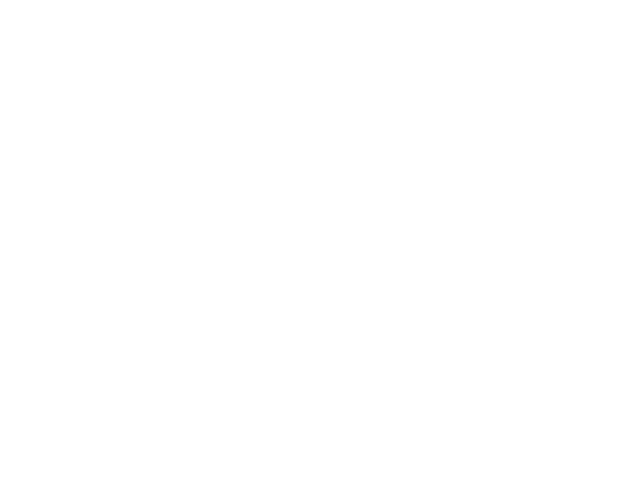

In [10]:
da.isel(time=0).plot()

<IPython.core.display.Javascript object>


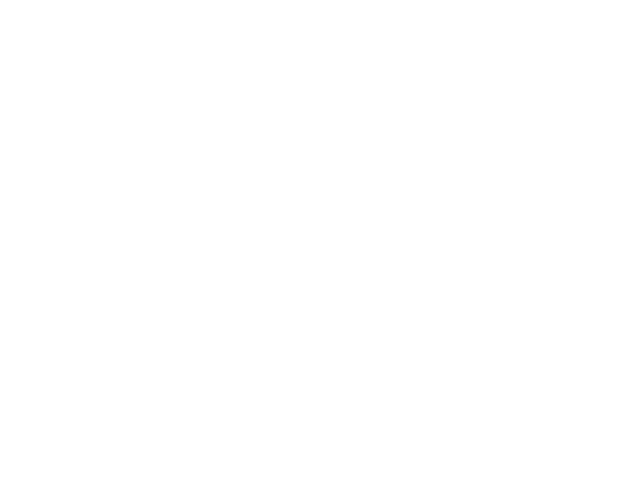

In [11]:
%matplotlib notebook
da.isel(time=0).plot()

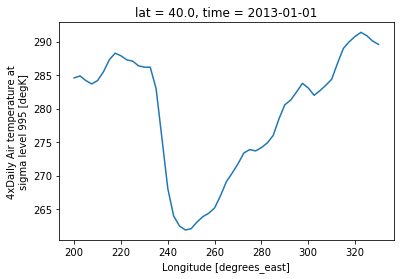

In [12]:
%matplotlib inline
da[0].sel(lat=40).plot()

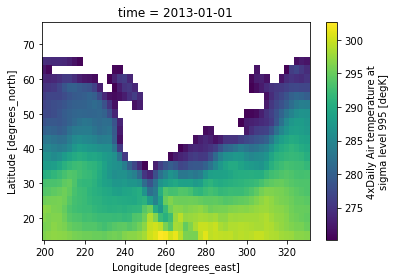

In [13]:
da[0].where(da[0] > 270).plot()

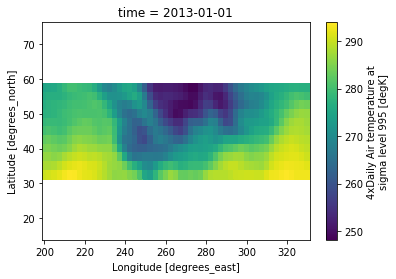

In [14]:
da[0].where( (da.lat > 30) & (da.lat < 60) ).plot()

In [15]:
da.time.values

array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ...,
       '2014-12-31T06:00:00.000000000', '2014-12-31T12:00:00.000000000',
       '2014-12-31T18:00:00.000000000'], dtype='datetime64[ns]')

In [16]:
da.resample(time='M').mean('time')

<xarray.DataArray 'air' (time: 24, lat: 25, lon: 53)>
array([[[244.4667 , 244.66354, 244.67027, ..., 242.49142, 243.40633,
         244.67577],
        [247.07323, 247.02248, 246.7275 , ..., 240.58205, 242.04489,
         244.70726],
        [250.37941, 249.83484, 249.10748, ..., 241.98434, 244.76712,
         249.00505],
        ...,
        [295.83795, 295.15085, 294.9229 , ..., 295.36826, 294.88437,
         294.26828],
        [296.46942, 296.31686, 295.84802, ..., 295.5876 , 295.34058,
         294.86536],
        [297.05316, 297.0418 , 296.73517, ..., 296.30438, 296.09732,
         296.0389 ]],

       [[240.73384, 240.7013 , 240.4115 , ..., 241.60518, 242.71988,
         243.94455],
        [241.93309, 242.06935, 241.913  , ..., 241.01428, 242.32481,
         244.72758],
        [245.32361, 245.0261 , 244.36955, ..., 243.41588, 245.7661 ,
         249.65858],
        ...,
        [295.43414, 294.5235 , 293.99045, ..., 294.88345, 294.36203,
         293.8489 ],
        [296.045  , 295.69263, 295.07242, ..., 295.1747 , 294.9716 ,
         294.45407],
        [296.4913 , 296.34406, 296.0286 , ..., 295.8211 , 295.65094,
         295.53192]],

       [[248.27585, 247.73009, 247.0482 , ..., 243.83452, 244.76682,
         245.82042],
        [250.65562, 250.29135, 249.79166, ..., 243.6167 , 244.8395 ,
         246.77019],
        [253.27975, 252.56424, 251.81566, ..., 242.50868, 245.0892 ,
         249.01338],
        ...,
        [295.3394 , 294.8799 , 294.815  , ..., 295.4275 , 295.01718,
         294.6564 ],
        [296.35123, 296.2598 , 295.94736, ..., 295.66583, 295.49203,
         295.20197],
        [297.12848, 297.13483, 296.9039 , ..., 296.25394, 296.0604 ,
         295.96176]],

       ...,

       [[261.71518, 260.80063, 259.87213, ..., 248.27313, 249.50867,
         251.20444],
        [268.74957, 268.42184, 268.10425, ..., 246.74707, 248.9449 ,
         252.23993],
        [268.18976, 267.1143 , 266.6785 , ..., 246.28467, 250.25516,
         255.51285],
        ...,
        [299.67892, 298.81247, 298.4198 , ..., 299.16025, 298.7638 ,
         298.3439 ],
        [300.0677 , 299.85614, 299.23767, ..., 299.28085, 299.32294,
         299.06226],
        [299.88477, 299.92157, 299.60358, ..., 299.71927, 299.6418 ,
         299.7508 ]],

       [[255.21977, 254.95395, 254.75484, ..., 246.24786, 246.95898,
         248.03082],
        [259.62137, 258.66876, 258.0333 , ..., 245.48958, 246.86938,
         249.4    ],
        [261.65494, 259.17813, 257.69272, ..., 247.10942, 249.94499,
         254.21428],
        ...,
        [298.04895, 297.35007, 297.22195, ..., 298.01172, 297.66013,
         297.14554],
        [298.96484, 298.81186, 298.27136, ..., 298.10403, 298.22104,
         297.88547],
        [299.17334, 299.2175 , 298.89566, ..., 298.71625, 298.74167,
         298.7802 ]],

       [[246.80156, 246.88907, 246.76907, ..., 240.07089, 241.08206,
         242.2817 ],
        [247.72998, 248.30064, 248.74443, ..., 238.61859, 240.3222 ,
         242.97026],
        [249.96893, 249.58516, 249.57521, ..., 237.70308, 241.23743,
         246.22667],
        ...,
        [296.4491 , 295.6914 , 295.75824, ..., 296.52817, 296.21747,
         295.8128 ],
        [297.44586, 297.43613, 297.1817 , ..., 296.95242, 297.05823,
         296.72897],
        [298.0472 , 298.22598, 298.0595 , ..., 297.6975 , 297.72318,
         297.71024]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-31 2013-02-28 ... 2014-12-31
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [17]:
da.max()

<xarray.DataArray 'air' ()>
array(317.4, dtype=float32)

### Change units and keep attributes

In [18]:
da_deg = da - 273.15
da_deg.attrs

{}

In [19]:
with xr.set_options(keep_attrs=True):
    da_deg = da - 273.15

da_deg.attrs['units'] = '°C'
da_deg.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': '°C',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

In [20]:
da_deg.units

'°C'

## Compute climatology

In [21]:
da.mean('time')

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733,
        253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 ,
        254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247,
        257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793,
        295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686,
        296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104,
        297.30502]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [22]:
da.mean('time', keep_attrs=True, skipna=False)

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733,
        253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 ,
        254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247,
        257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793,
        295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686,
        296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104,
        297.30502]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Winter
.where: http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html

In [23]:
da['time.month'].head(300)

<xarray.DataArray 'month' (time: 300)>
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-03-16T18:00:00

In [24]:
da_winter = da.where( (da['time.month'] >= 12) | (da['time.month'] <= 2), drop=True )
da_winter.time

<xarray.DataArray 'time' (time: 720)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ..., '2014-12-31T06:00:00.000000000',
       '2014-12-31T12:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

In [25]:
da_winter['time.month'].head(300)

<xarray.DataArray 'month' (time: 300)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-12-16T18:00:00

## Spatial average
https://pangeo.io/use_cases/physical-oceanography/sea-surface-height.html

With new version: http://xarray.pydata.org/en/stable/examples/area_weighted_temperature.html

In [26]:
import numpy as np

In [27]:
def spatial_average(da):
    coslat = np.cos(np.deg2rad(da.lat)).where(~da.isnull())
    weights = coslat / coslat.sum(dim=('lat', 'lon'))
    return (da * weights).sum(dim=('lat','lon'))

In [28]:
da_spatial_average = spatial_average(da)
da_spatial_average

<xarray.DataArray (time: 2920)>
array([279.7662 , 279.11688, 278.7536 , ..., 278.3541 , 278.3689 ,
       278.91016], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

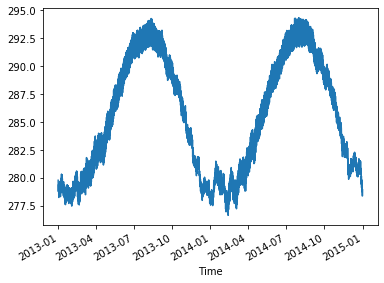

In [29]:
da_spatial_average.plot()

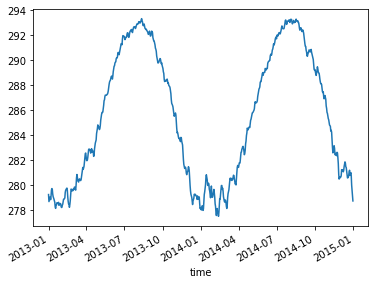

In [30]:
da_spatial_average.resample(time='D').mean('time').plot()

Looks like there is a new method with a new version of xarray: http://xarray.pydata.org/en/stable/examples/area_weighted_temperature.html

## Annual cylce

In [31]:
ac = da.groupby('time.month').mean('time')
ac

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
array([[[246.34987, 246.38608, 246.21518, ..., 243.06113, 244.08795,
         245.6467 ],
        [248.8576 , 248.90733, 248.7104 , ..., 241.52866, 243.50865,
         246.75471],
        [251.57712, 251.19661, 250.71463, ..., 243.39891, 246.78462,
         251.56572],
        ...,
        [295.85028, 295.24405, 295.22684, ..., 295.18625, 294.65707,
         294.0485 ],
        [296.5446 , 296.46982, 296.15994, ..., 295.35593, 295.0812 ,
         294.53006],
        [297.15417, 297.2383 , 297.04892, ..., 296.01797, 295.77554,
         295.63647]],

       [[246.67715, 246.40576, 245.9484 , ..., 241.85838, 243.0021 ,
         244.44383],
        [247.8001 , 247.75992, 247.47757, ..., 240.64706, 242.26633,
         245.06662],
        [249.07079, 248.57234, 247.94254, ..., 242.42874, 245.33348,
         249.72273],
        ...,
        [295.92886, 295.41788, 295.16602, ..., 294.4443 , 293.78143,
         293.18265],
        [296.78754, 296.63443, 296.15707, ..., 294.51166, 294.2178 ,
         293.70258],
        [297.2889 , 297.2165 , 296.85797, ..., 295.16058, 294.9558 ,
         294.87967]],

       [[251.03168, 250.67987, 250.18945, ..., 242.19398, 243.11484,
         244.30956],
        [252.97194, 252.86617, 252.57347, ..., 241.61102, 243.02509,
         245.38196],
        [254.46768, 254.09142, 253.63428, ..., 241.67184, 244.49664,
         248.74258],
        ...,
        [295.65652, 295.24582, 295.22464, ..., 294.7663 , 294.16412,
         293.6729 ],
        [296.70294, 296.68756, 296.3824 , ..., 294.85083, 294.57034,
         294.15213],
        [297.38174, 297.4631 , 297.22668, ..., 295.3349 , 295.11124,
         295.01654]],

       ...,

       [[261.8136 , 261.21255, 260.5036 , ..., 248.19336, 249.06995,
         250.41624],
        [269.02225, 268.92944, 268.71478, ..., 246.41554, 248.16833,
         251.14897],
        [269.64017, 268.7958 , 268.45483, ..., 246.01215, 249.6174 ,
         254.69598],
        ...,
        [299.09723, 298.30466, 297.9945 , ..., 299.09454, 298.6955 ,
         298.29483],
        [299.43155, 299.23853, 298.7375 , ..., 299.2589 , 299.28873,
         299.0363 ],
        [299.37054, 299.42462, 299.15607, ..., 299.72403, 299.66312,
         299.76233]],

       [[253.74484, 253.64487, 253.49716, ..., 242.96066, 243.9345 ,
         245.14209],
        [259.12967, 258.62927, 258.19144, ..., 241.84921, 243.07965,
         245.46625],
        [261.04227, 258.83536, 257.51193, ..., 242.38234, 245.13663,
         249.52368],
        ...,
        [297.8426 , 297.1406 , 296.98773, ..., 297.96884, 297.56888,
         297.1611 ],
        [298.58783, 298.42026, 297.96896, ..., 298.16412, 298.19397,
         297.9083 ],
        [298.81143, 298.8566 , 298.62103, ..., 298.72955, 298.7519 ,
         298.8189 ]],

       [[247.971  , 248.02118, 247.91302, ..., 239.7719 , 241.02383,
         242.62823],
        [249.73361, 250.16037, 250.48581, ..., 238.78964, 240.96469,
         244.11626],
        [252.0296 , 251.53136, 251.36629, ..., 238.07542, 241.91293,
         247.06987],
        ...,
        [296.76508, 295.97668, 295.88922, ..., 296.45605, 296.09137,
         295.65756],
        [297.46814, 297.38025, 297.04428, ..., 296.8556 , 296.84668,
         296.52133],
        [297.8809 , 297.9868 , 297.77554, ..., 297.60034, 297.5655 ,
         297.53763]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

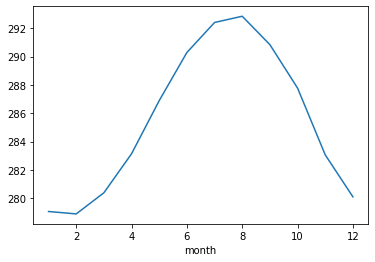

In [32]:
spatial_average(ac).plot()